# Digital Image Processing (CSE/ECE 478) Monsoon-2019

Solutions for DIP Assignment-4 on

1. Skeletonization
1. Isolate objects
1. Object Counting
1. Morphological and logical operations
1. Connected Components


### Importing dependency libraries

In [20]:
import numpy as np
import cv2
import os,sys
from matplotlib import pyplot as plt
from operator import itemgetter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from collections import Counter
import scipy.ndimage.morphology as morphy_scipy

%matplotlib inline

### Utility functions

In [21]:
def getColorSpaces(image):
    rgb = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    
    return rgb,gray

def getImageDimnesion(image):
    height,width = image.shape[:2]
    
    return height,width

def showImage(image,title,cmap):
    plt.imshow(image,cmap=cmap)
    plt.axis('off')
    plt.title(title)

def splitRGBChannels(image):
  red, green, blue= cv2.split(img)
  
  return red, green, blue

def getBinaryImage(gray):
    ret,thresh= cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    return thresh

 # <center>Question 1 -Skeletonization </center>

In [22]:
def getSkeletonizedImage(binary):
    h1 = np.array([[0, 0, 0],[0, 1, 0],[1, 1, 1]]) 
    m1 = np.array([[1, 1, 1],[0, 0, 0],[0, 0, 0]]) 
    h2 = np.array([[0, 0, 0],[1, 1, 0],[0, 1, 0]]) 
    m2 = np.array([[0, 1, 1],[0, 0, 1],[0, 0, 0]])    
    hit_list = [] 
    miss_list = []
    for k in range(4): 
        hit_list.append(np.rot90(h1, k))
        hit_list.append(np.rot90(h2, k))
        miss_list.append(np.rot90(m1, k))
        miss_list.append(np.rot90(m2, k))    
    binary = binary.copy()
    while True:
        last = binary
        for hit, miss in zip(hit_list, miss_list): 
            hm = morphy_scipy.binary_hit_or_miss(binary, hit, miss) 
            binary = np.logical_and(binary, np.logical_not(hm))             
        if np.all(binary == last):  
            break
    return binary


#Kernel sized hit or miss status
def getHitMissStatus(binary_image,kernel):

    h,w = binary_image.shape
    for i in range(h):
        for j in range(w):
            if kernel[i,j]!=-1 and binary_image[i,j]!=kernel[i,j]:
                return False
    return True

def ConvolveHitMiss(binary_image,kernel):
    new_binary_image = binary_image.copy()
    h,w = new_binary_image.shape
    for i in range(1,h-1):
        for j in range(1,w-1):
            if getHitMissStatus(binary_image[i-1:i+2,j-1:j+2],kernel):
                new_binary_image[i,j] = 0    
    return new_binary_image 

def getSkeletonizedbinary_Custom(binary_image,threshold=1):
    S1 = np.array([
            [0,0,0],
            [-1,1,-1],
            [1,1,1]])
    S2 = np.array([
            [-1,0,0],
            [1,1,0],
            [-1,1,-1]])
    bin_binary_image = (binary_image < 127).astype(np.uint8)

    while True:
        new_binary_image = bin_binary_image
        for i in range(4):
            new_binary_image = ConvolveHitMiss(new_binary_image,S1)    
            new_binary_image = ConvolveHitMiss(new_binary_image,S2)    
            S1 = np.rot90(S1)
            S2 = np.rot90(S2)  
        diff = np.mean(np.abs(new_binary_image-bin_binary_image))
        if diff <= threshold: 
            break
        else:
            bin_binary_image = new_binary_image
    return new_binary_image

def getSkeletonizedbinary_Custom2(binary_image,threshold=1):
    S1 = np.array([
            [0,0,0],
            [-1,1,-1],
            [1,1,1]])
    S2 = np.array([
            [-1,0,0],
            [1,1,0],
            [-1,1,-1]])
    bin_binary_image = (binary_image < 127).astype(np.uint8)
    
    S1_list = [] 
    S2_list = []
    
    for k in range(4):        
        S1_list.append(np.rot90(S1, k))
        S2_list.append(np.rot90(S2, k))

    while True:
        new_binary_image = bin_binary_image
        for s1,s2 in zip(S1_list,S2_list):
            new_binary_image = ConvolveHitMiss(new_binary_image,s1)    
            new_binary_image = ConvolveHitMiss(new_binary_image,s2)    

        diff = np.mean(np.abs(new_binary_image-bin_binary_image))
        print('Diff :',diff)
        if diff <= threshold: 
            break
        else:
            bin_binary_image = new_binary_image
    return new_binary_image


Diff : 26.473515625
Diff : 24.457421875
Diff : 17.243046875
Diff : 8.976796875
Diff : 2.965703125
Diff : 0.66671875


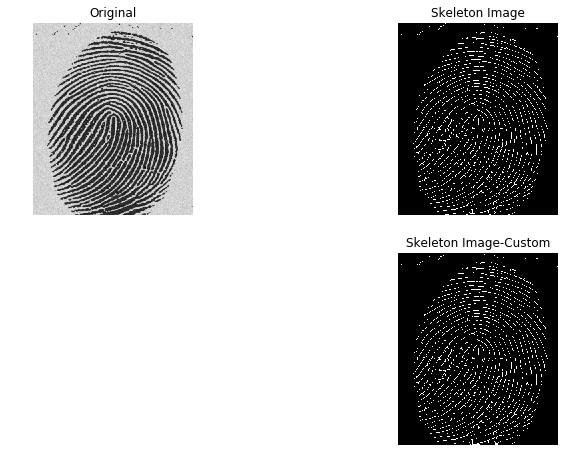

In [23]:


img_path= r'./input_data/fingerprint.jpg'
img = cv2.imread(img_path)
rgb,gray=getColorSpaces(img)

plt.figure(figsize=(12, 12))

plt.subplot(3,2,1) 
plt.axis('off')
plt.title('Original') 
plt.imshow(gray,cmap='gray')

binary=getBinaryImage(gray)
img_not = cv2.bitwise_not(binary)
skeliton = getSkeletonizedImage(img_not)

plt.subplot(3,2,2) 
plt.axis('off')
plt.title('Skeleton Image')
plt.imshow(skeliton,cmap='gray')

skeleton_image = getSkeletonizedbinary_Custom2(gray)   

plt.subplot(3,2,4) 
plt.axis('off')
plt.title('Skeleton Image-Custom')
plt.imshow(skeleton_image,cmap='gray')


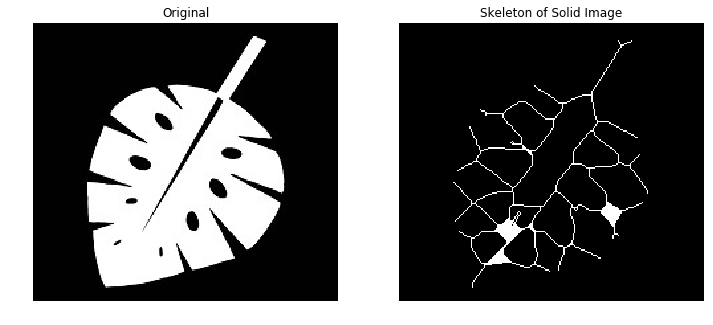

In [24]:
img_path= 'C:/SAI/IIIT/2019_Monsoon/DIP/Assignment4/input_data/leaf.jpg'
img = cv2.imread(img_path)
rgb,gray=getColorSpaces(img)

plt.figure(figsize=(12, 12))

gray_neg = cv2.bitwise_not(gray)

plt.subplot(1,2,1) 
plt.axis('off')
plt.title('Original') 
plt.imshow(gray,cmap='gray')

skeleton_image = getSkeletonizedbinary_Custom(gray_neg)   
plt.subplot(1,2,2) 
plt.axis('off')
plt.title('Skeleton of Solid Image')
plt.imshow(skeleton_image,cmap='gray')

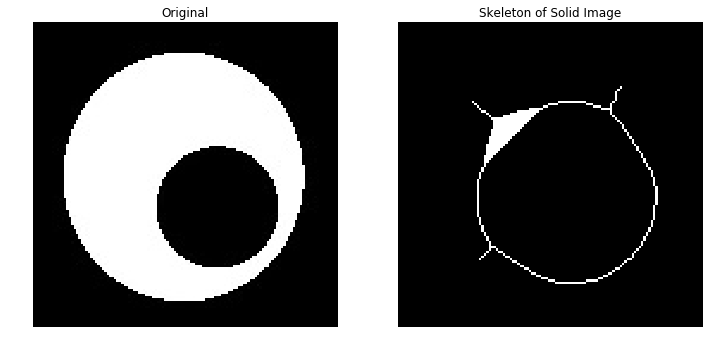

In [25]:
img_path= 'C:/SAI/IIIT/2019_Monsoon/DIP/Assignment4/input_data/holed.jpg'
img = cv2.imread(img_path)
rgb,gray=getColorSpaces(img)

plt.figure(figsize=(12, 12))

gray_neg = cv2.bitwise_not(gray)

plt.subplot(1,2,1) 
plt.axis('off')
plt.title('Original') 
plt.imshow(gray,cmap='gray')

skeleton_image = getSkeletonizedbinary_Custom(gray_neg)   
plt.subplot(1,2,2) 
plt.axis('off')
plt.title('Skeleton of Solid Image')
plt.imshow(skeleton_image,cmap='gray')


### Explain the role of structuring elements S1; S2.

1. S1 detects edges and curves
1. S2 right corners ,flat diagonals - Corner points.used to find right angle convex corner points in images

### By analyzing the outputs at the end of each skeletonization pass, explain why multiple passes are/may be required.
1. Multiple passes are required to progressively thin the object by removing pixels on the boundary


#  <center>Question 2 </center>

### Find the organs of interest in the provided CT image kidney.jpg. The organs of interest are as shown below.
#### Hint : Use thresholding and morphological operations


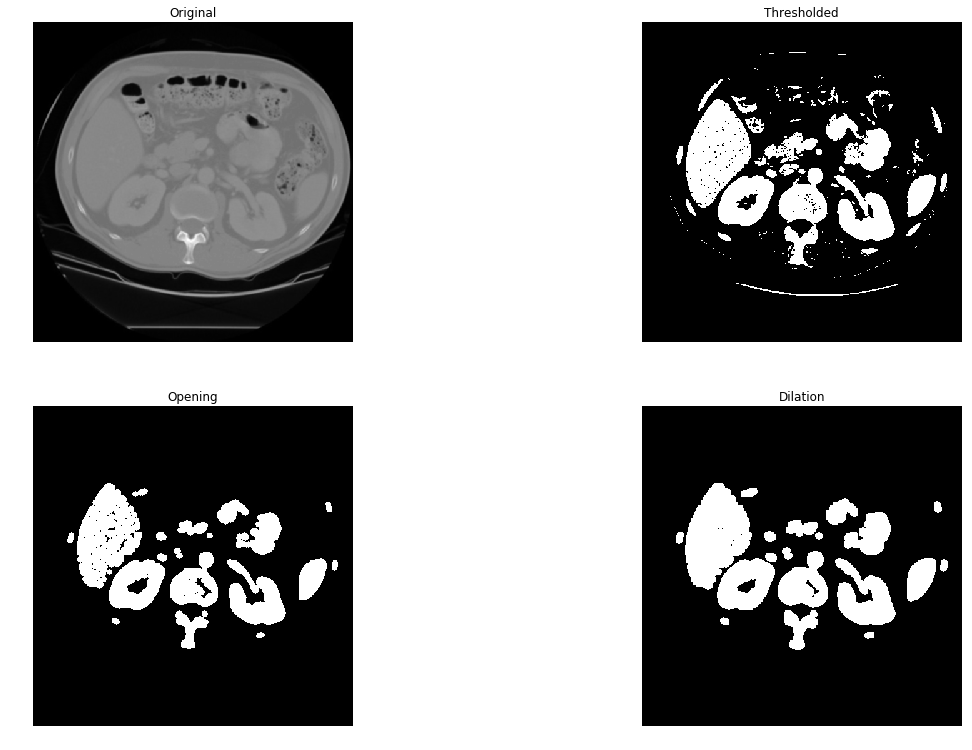

In [26]:

 
img_path=r'C:/SAI/IIIT/2019_Monsoon/DIP/Assignment4/input_data/kidney.jpg'
img = cv2.imread(img_path)

 # Remove noise by blurring with a Gaussian filter
img = cv2.GaussianBlur(img, (3, 3), 0)
    
rgb,gray=getColorSpaces(img)



_, binary = cv2.threshold(gray, 131, 255, cv2.THRESH_BINARY)

kernel1=np.array([
	   [0,0, 0, 0, 0, 0, 0],
       [0,0, 0, 0, 0, 0, 0],
       [0,0, 1, 1, 1, 0, 0],
       [0,0, 1, 1, 1, 0, 0],
       [0,0, 1, 1, 1, 0, 0],
       [0,0, 1, 1, 1, 0, 0],
	   [0,0, 0, 0, 0, 0, 0],
	   [0,0, 0, 0, 0, 0, 0],
	   
	   ], dtype=np.uint8)
    
    
#binary = cv2.morphologyEx(binary, cv2.MORPH_HITMISS, kernel1)    


#closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)


#erosion = cv2.erode(binary,kernel,iterations = 1)
#dilation = cv2.dilate(erosion,kernel,iterations = 1)

#opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel) 

se_circular=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))



opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, se_circular)
#
#kernel = np.ones((5,5),np.uint8)
#closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
#erosion = cv2.erode(binary,kernel,iterations = 1)
#closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(opening,kernel,iterations = 1)


plt.figure(figsize=(20, 20))

plt.subplot(3,2,1) 
plt.axis('off')
plt.title('Original') 
plt.imshow(gray,cmap='gray')

plt.subplot(3,2,2) 
plt.axis('off')
plt.title('Thresholded') 
plt.imshow(binary,cmap='gray')

plt.subplot(3,2,3) 
plt.axis('off')
plt.title('Opening') 
plt.imshow(opening,cmap='gray')

plt.subplot(3,2,4) 
plt.axis('off')
plt.title('Dilation') 
plt.imshow(dilation,cmap='gray')


ret, labels = cv2.connectedComponents(dilation)

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    cv2.imshow('labeled.png', labeled_img)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()

imshow_components(labels)



#  <center>Question 3 - Object counting </center>

### Read in the binary image coins.jpg and Write a script which uses the image as input and outputs a new image containing 
1. only the coins touching the boundary of the image
2. only the coins which overlap with each other
3. only non-overlapping coins

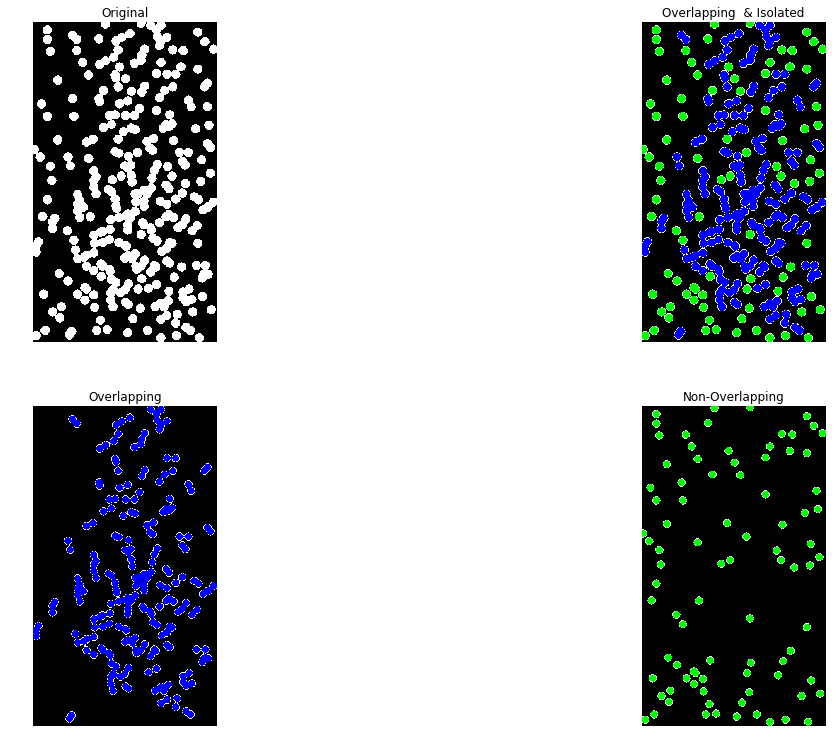

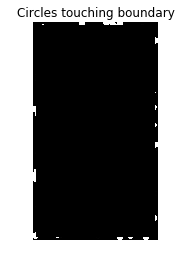

In [27]:

def ifCircular(contour,lowerLimit,UpperLimit):
    perimeter = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    if perimeter == 0:
        return False
    circularity = 4*np.pi*(area/(perimeter*perimeter))
    
    if lowerLimit < circularity < UpperLimit:
        return True
    else:
        return False


img_path= 'C:/SAI/IIIT/2019_Monsoon/DIP/Assignment4/input_data/coins.jpg'
img = cv2.imread(img_path)
rgb,gray=getColorSpaces(img)

plt.figure(figsize=(20, 20))


def identifyCircles(gray,min_cnt_area = 320):
    img_copy=img.copy()
    ret,thresh= cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(thresh,kernel,iterations = 1)        
    #If you use  RETR_EXTERNAL flag, it returns only extreme outer flags. All child contours are left behind. 
    _,contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        area=cv2.contourArea(contour)    
        if np.ceil(area)/min_cnt_area>1:
            cv2.drawContours(img_copy, [contour], -1, (0,0,255), 2)
            cv2.fillPoly(img_copy, pts =[contour], color=(0,0,255))
        else:
            if np.ceil(area)/min_cnt_area<=1:    
                if ifCircular(contour,0.75,1):
                    cv2.drawContours(img_copy, [contour], -1, (0,255,0), 2)
                    cv2.fillPoly(img_copy, pts =[contour], color=(0,255,0))
    return img_copy


ret,thresh= cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresh,kernel,iterations = 1)        
#If you use  RETR_EXTERNAL flag, it returns only extreme outer flags. All child contours are left behind. 
_,contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

   
def getOverlappingCircles(gray,min_cnt_area=320):
    mask = np.zeros_like(img)
    for contour in contours:
        area=cv2.contourArea(contour)    
        if np.ceil(area)/min_cnt_area>1:
            cv2.drawContours(mask, [contour], -1, (255,255,255), 2)
            cv2.fillPoly(mask, pts =[contour], color=(0,0,255))
            mask = cv2.bitwise_and(img, mask)
            
    return mask 

def getNonOverlappingCircles(gray,min_cnt_area=320):
          
    mask = np.zeros_like(img)
    for contour in contours:
        area=cv2.contourArea(contour)         
        if np.ceil(area)/min_cnt_area<=1:    
            if ifCircular(contour,0.75,1):
                cv2.drawContours(mask, [contour], -1, (255,255,255), 2)
                cv2.fillPoly(mask, pts =[contour], color=(0,255,0))
                mask = cv2.bitwise_and(img, mask)
    return mask      
            
plt.subplot(3,2,1) 
plt.axis('off')
plt.title('Original') 
plt.imshow(gray,cmap='gray')

circles_all=identifyCircles(gray)

plt.subplot(3,2,2) 
plt.axis('off')
plt.title('Overlapping  & Isolated')
plt.imshow(circles_all,cmap='gray')

circles_overlap=getOverlappingCircles(gray)

plt.subplot(3,2,3) 
plt.axis('off')
plt.title('Overlapping')
plt.imshow(circles_overlap,cmap='gray')

circles_non_overlap=getNonOverlappingCircles(gray)

plt.subplot(3,2,4) 
plt.axis('off')
plt.title('Non-Overlapping')
plt.imshow(circles_non_overlap,cmap='gray')


plt.show()

#cv2.imshow("Image with circles",mask)
#
#k = cv2.waitKey(0)
#if k == 27:
#    cv2.destroyAllWindows()


def getRadius(min_cnt_area=320): 
    circle_area=min_cnt_area #2*np.pi()*r 
    r   =circle_area/(2*np.pi) 
    return r
     

aoi_poly = img.copy()
# Find circles touching image boundary
h, w, _ = img.shape
radius = 10
touching = 0
aoi_corners = np.array(([radius,radius], 
                      [w-radius,radius], 
                      [w-radius, h-radius], 
                      [radius, h-radius]))
cv2.fillPoly(aoi_poly, [aoi_corners], [0,0,0])


plt.axis('off')
plt.title('Circles touching boundary')
plt.imshow(aoi_poly)
plt.show()


#  <center>Question 4 - Morphological and Logical operations </center>

### Read in the binary image objects.png and Write a script which uses the image as input and uses morphological and logical operations to answer the questions below.
1. How many objects have one or more holes?
2. How many square objects are in the image?
3. Identify the square objects that have holes.
4. Identify the circular objects that have no holes


How many objects have one or more holes?
Number of objects that have one or more holes: 6

How many square objects are in the image?
Number of square objects: 11

How many objects have one or more holes?
Number of objects that have one or more holes: 2

How many objects have one or more holes?
Number of objects that have one or more holes: 4


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

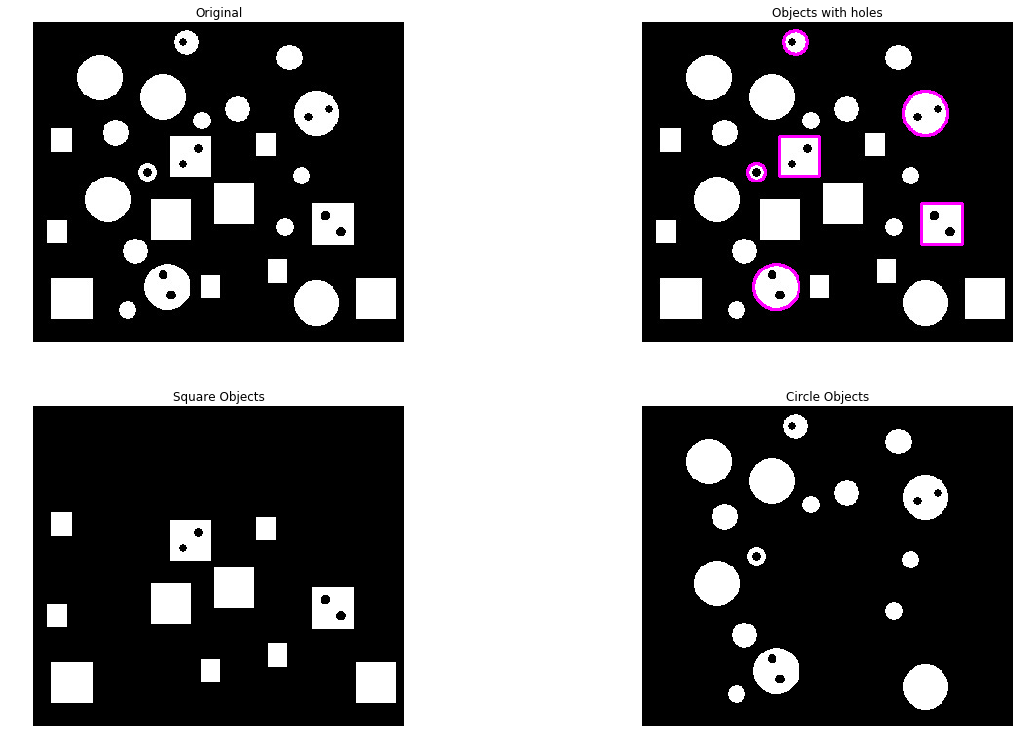

In [28]:


def getSquareObjects(binary):    
    image, contours, hierarchy  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    hierarchy = hierarchy[0] # get the actual inner list of hierarchy descriptions
    mask = np.zeros_like(img)
    img_copy=img.copy()
            
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
        if len(approx) == 4:
#            cv2.drawContours(img_copy, [cnt], -1, (255,0,255), 2)
            cv2.fillPoly(mask, pts =[cnt], color=(255,255,255))
            mask = cv2.bitwise_and(img_copy, mask)
    
    rgb,gray=getColorSpaces(mask)
    square_objects=getBinaryImage(gray)
    
    return  square_objects       

def getCircleObjects(binary):    
    image, contours, hierarchy  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    hierarchy = hierarchy[0] # get the actual inner list of hierarchy descriptions
    mask = np.zeros_like(img)
    img_copy=img.copy()
            
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
        if len(approx) > 4:
#            cv2.drawContours(img_copy, [cnt], -1, (255,0,255), 2)
            cv2.fillPoly(mask, pts =[cnt], color=(255,255,255))
            mask = cv2.bitwise_and(img_copy, mask)
    
    rgb,gray=getColorSpaces(mask)
    circle_objects=getBinaryImage(gray)
    
    return  circle_objects   


def getSqaureCircleCount(binary):
    rect_count=0
    circle_count=0
    image, contours, hierarchy  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
        if len(approx) == 4:
           rect_count=rect_count+1
        else:    
           circle_count=circle_count+1
    return    rect_count,    circle_count
   
def getShape(contour):    
    approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour, True), True)
    if len(approx) == 4:
       return 1
    else:    
       return 2
    
    
def getObjectsWithHoles(binary):    
    image, contours, hierarchy  = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    hierarchy = hierarchy[0] # get the actual inner list of hierarchy descriptions
    mask = np.zeros_like(img)
    img_copy=img.copy()    
    count_with_holes=0
    for component in zip(contours, hierarchy):
        currentContour = component[0]
        currentHierarchy = component[1]
        x,y,w,h = cv2.boundingRect(currentContour)
#        if currentHierarchy[2] < 0:
#            #Single hierarchy contour
#            cv2.drawContours(img_copy, [currentContour], -1, (0,255,0), 2)
#            mask = cv2.bitwise_and(img_copy, mask)
        if currentHierarchy[2] >= 0:
            count_with_holes=count_with_holes+1
            cv2.drawContours(img_copy, [currentContour], -1, (255,0,255), 2)
            mask = cv2.bitwise_and(img_copy, mask)
    print('\nHow many objects have one or more holes?')
    print('Number of objects that have one or more holes:',count_with_holes)        
    return  img_copy       
 
 
img_path=r'C:/SAI/IIIT/2019_Monsoon/DIP/Assignment4/input_data/objects.jpg'
img = cv2.imread(img_path)
rgb,gray=getColorSpaces(img)

binary=getBinaryImage(gray)

plt.figure(figsize=(20, 20))

plt.subplot(3,2,1) 
plt.axis('off')
plt.title('Original') 
plt.imshow(gray,cmap='gray')

objects_with_holes=getObjectsWithHoles(binary)
plt.subplot(3,2,2) 
plt.axis('off')
plt.title('Objects with holes') 
plt.imshow(objects_with_holes,cmap='gray')

rect_count, circle_count=getSqaureCircleCount(binary)
print('\nHow many square objects are in the image?')
print('Number of square objects:',rect_count)


square_objects=getSquareObjects(binary)
plt.subplot(3,2,3) 
plt.axis('off')
plt.title('Square Objects') 
plt.imshow(square_objects,cmap='gray')

getObjectsWithHoles(square_objects)

circle_objects=getCircleObjects(binary)
plt.subplot(3,2,4) 
plt.axis('off')
plt.title('Circle Objects') 
plt.imshow(circle_objects,cmap='gray')

getObjectsWithHoles(circle_objects)

#  <center>Question 5 - Connected Components. </center>

Number of objects that have one or more holes: 6
Number of objects that have one or more holes: 8
Number of objects that have one or more holes: 4
Number of objects that have one or more holes: 0
Number of objects that have one or more holes: 10


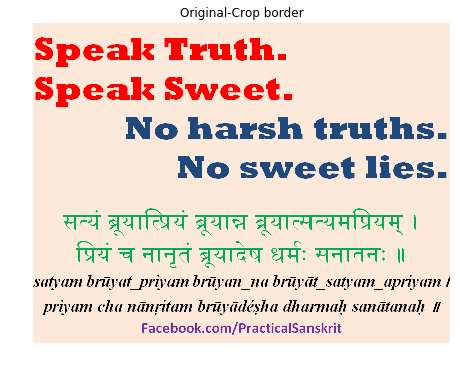

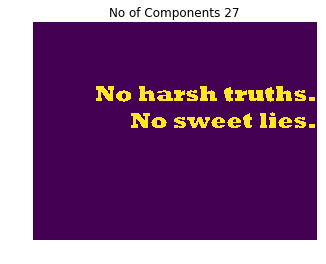

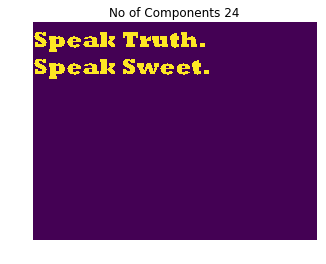

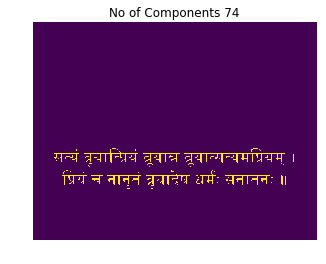

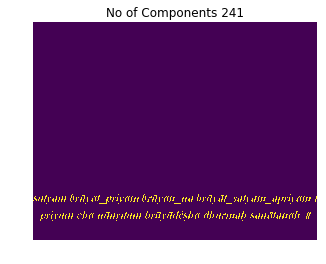

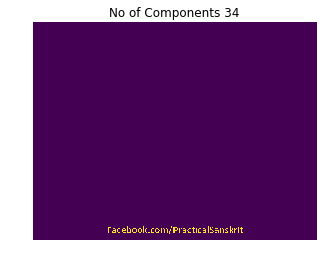

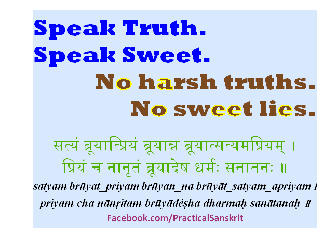

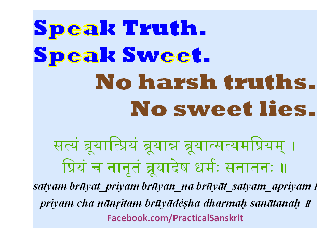

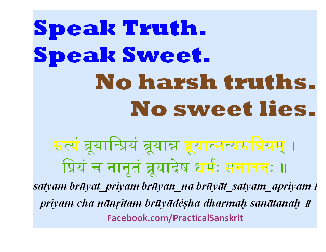

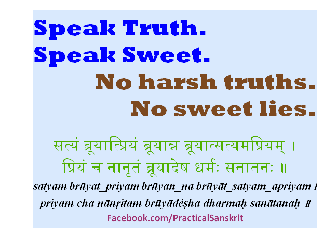

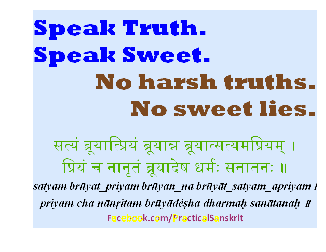

In [30]:
def cropBorder(image,dx=20,dy=20):
    h,w=getImageDimnesion(image)    
    im=image.copy()
    im = im[dy:h-dy,dx:w-dx]
    
    return im
    
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

#https://stackoverflow.com/questions/50899692/most-dominant-color-in-rgb-image-opencv-numpy-python
def getTopColors(im,num_colors=6):
    #Get color frequnecies
    color, colorcnt = np.unique(im.reshape(-1, im.shape[2]), axis=0, return_counts=True);
    #Sort the occarnces in reverse order to get top n-indices
    indices=(-colorcnt).argsort()[:6]
#    print(indices)
    
    bg_color=color[indices[0]]
    top_colors=[]
    #Most dominant color is background color,which is not text, threfore remove this item from the list
    # and consider only top 5 colors
    for idx in indices[1:]:
        top_colors.append(color[idx])
    
    return np.array(top_colors),bg_color

 
img_path=r'C:/SAI/IIIT/2019_Monsoon/DIP/Assignment4/input_data/fbpost.png'
    
#img_path=r'C:/SAI/IIIT/2019_Monsoon/DIP/Assignment4/input_data/test_components.jpg'


img = cv2.imread(img_path)
img=cropBorder(img,20,20)

rgb,gray=getColorSpaces(img)

height,width=getImageDimnesion(img)

binary=getBinaryImage(gray)

plt.figure(figsize=(20, 20))

plt.subplot(3,2,1) 
plt.axis('off')
plt.title('Original-Crop border') 
plt.imshow(rgb)

im=rgb.copy()
top_colors,bg_color=getTopColors(im)
#print(top_colors)


#def getColoredText(im,color,bg_color):    
#    h,w = getImageDimnesion(img)
#    mask = im.copy()
#    
#    for i in range(h):
#        for j in range(w):
#            if not np.array_equal(im[i,j,:],color):
#                mask[i,j] = bg_color
#    return  mask           
#
#
#text_images = []
#for color in top_colors:
#    mask=getColoredText(im,color,bg_color)
#    text_images.append(mask)
#
#
#for color_img in text_images:
#    plt.figure()
#    plt.axis('off')
#    plt.imshow(color_img,cmap='gray')

def find(union_find,child,parent):
	if child in union_find:
		return find(union_find ,union_find[child],parent)
	else:
		return child
		
def ccl(binary):
    union_find = {}
    component_count = 1
    h,w = binary.shape
    binary = np.pad(binary,(0,1),'constant')
    img_labelled = np.zeros((h+1,w+1))
    for i in range(h):
        for j in range(w):
            if binary[i,j]==1:
                if i==0 and j==0:
                    img_labelled[i,j] = component_count
                elif i==0 and img_labelled[i,j-1]!=0:
                    img_labelled[i,j] = img_labelled[i,j-1]
                elif j==0 and img_labelled[i-1,j]!=0:
                    img_labelled[i,j] = img_labelled[i-1,j]
                
                elif img_labelled[i,j-1] + img_labelled[i-1,j-1] + img_labelled[i-1,j] + img_labelled[i-1,j+1] > 0:
                    aoi = np.array([img_labelled[i,j-1] , img_labelled[i-1,j-1] , img_labelled[i-1,j] , img_labelled[i-1,j+1]])
                    if np.sum(aoi==0) == 3:
                        img_labelled[i,j] = aoi[np.where(aoi!=0)]
                    else:
                        img_labelled[i,j] = min(aoi[np.where(aoi!=0)])
                    for k in aoi:
                        if k != 0 and k!= img_labelled[i,j]:
                            union_find[k] = img_labelled[i,j]        
                else:
                    component_count = component_count + 1
                    img_labelled[i,j] = component_count        
    for i in range(h):
        for j in range(w):
            if img_labelled[i,j]:
                img_labelled[i,j] = find(union_find,img_labelled[i,j],img_labelled[i,j])
                
    components = set()
    h,w = img_labelled.shape
    for i in range(h):
        for j in range(w):
            if img_labelled[i,j]:
                components.add(img_labelled[i,j])
    return img_labelled,components
    
    
def getColoredText(im,color,bg_color):    
    h,w = getImageDimnesion(img)
    mask = np.zeros_like(binary)
    
    for i in range(h):
        for j in range(w):
            if  np.array_equal(im[i,j,:],color):
                mask[i,j] = 1
    return  mask           


text_images = []
lst_labelled=[]

for color in top_colors:
    mask=getColoredText(im,color,bg_color)
    text_images.append(mask)

for color_img in text_images:
    plt.figure()
    plt.axis('off')    
    img_labelled,components=ccl(color_img)
    
    plt.title('No of Components '+str(len(components))) 
    plt.imshow(color_img)

 
def getObjectsWithHoles(binary):    
    image, contours, hierarchy  = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    hierarchy = hierarchy[0] # get the actual inner list of hierarchy descriptions
    mask = np.zeros_like(img)
    img_copy=img.copy()    
    count=0
    for component in zip(contours, hierarchy):
        currentContour = component[0]
        currentHierarchy = component[1]

        if currentHierarchy[2] >= 0:
            count=count+1
            cv2.drawContours(img_copy, [currentContour], -1, (255,255,0), 2)
            cv2.fillPoly(mask, pts =[currentContour], color=(255,255,0))
            mask = cv2.bitwise_and(img_copy, mask)
    
    print('Number of objects that have one or more holes:',count)        
    return  img_copy       



for color_img in text_images:
    plt.figure()
    plt.axis('off')    
    im=getObjectsWithHoles(color_img)

    plt.imshow(im)
